<a href="https://colab.research.google.com/github/shubham2007-pro/5CS037/blob/main/Workshop10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1: IMDB Movie Review Sentiment Analysis

Block 1: Import Required Libraries

In [7]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve



Block 2: Download NLTK Resources (Colab Requirement)

In [8]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Block 3: Load IMDB Movie Review Dataset from Drive

In [9]:
# Load dataset (adjust filename if needed)
df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Block 4: Dataset Inspection

In [11]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Check missing values
print(df.isnull().sum())


Dataset Shape: (50000, 2)
review       0
sentiment    0
dtype: int64


Block 5: Encode Target Variable

In [12]:
# Convert sentiment to binary labels
# positive → 1, negative → 0
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


Block 6: Text Preprocessing Function

In [13]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub('[^a-z]', ' ', text)

    # Tokenization
    words = text.split()

    # Stopword removal + stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]

    return ' '.join(words)


In [14]:
# Apply preprocessing
df['clean_review'] = df['review'].apply(preprocess_text)


Block 7: Train-Test Split (80% – 20%)

In [15]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Block 8: Bag-of-Words using CountVectorizer

In [16]:
vectorizer = CountVectorizer(max_features=5000)

X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)


Block 9: Train Naive Bayes Classifier

In [17]:
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)


MultinomialNB()

Block 10: Predictions

In [18]:
y_pred = nb_model.predict(X_test_bow)
y_prob = nb_model.predict_proba(X_test_bow)[:, 1]


Block 11: Model Evaluation

Accuracy

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8494


Precision, Recall, F1-Score

In [20]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.85      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



Confusion Matrix

In [21]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[4239  722]
 [ 784 4255]]


ROC-AUC Score

In [22]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.912517937591323


ROC Curve

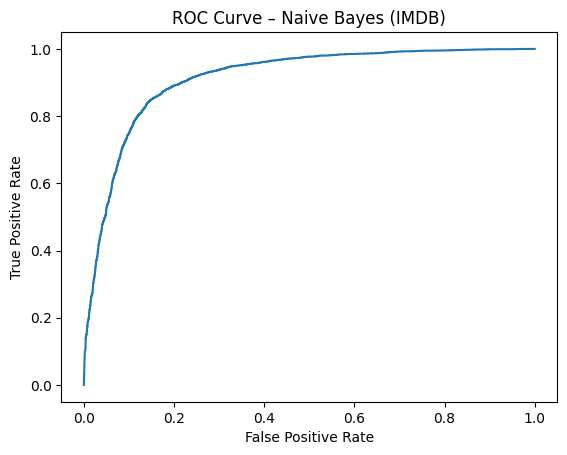

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Naive Bayes (IMDB)")
plt.show()


Exercise 2: Feature Selection using Wrapper Method (RFE)

Block 1: Import Required Libraries

In [24]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
from sklearn.datasets import load_breast_cancer

# Model and feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Train-test split and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve


Block 2: Load Breast Cancer Dataset from sklearn

In [25]:
# Load dataset
data = load_breast_cancer()

# Convert to DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Combine for EDA
df = pd.concat([X, pd.Series(y, name='target')], axis=1)

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Block 3: Basic Exploratory Data Analysis (EDA)

In [26]:
print("Dataset Shape:", df.shape)


Dataset Shape: (569, 31)


In [27]:
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [28]:
df.isnull().sum()


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


Block 4: Target Variable Distribution (Visualization)

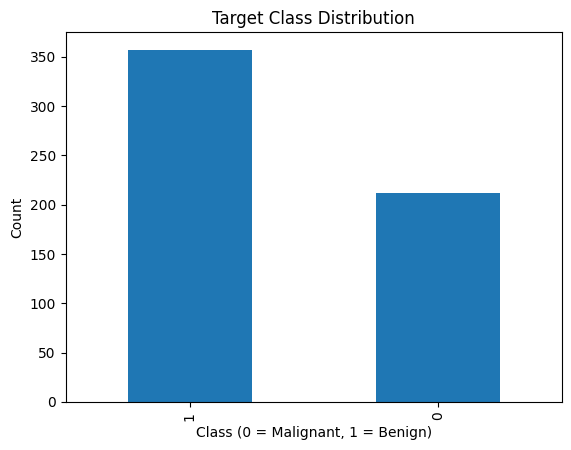

In [29]:
df['target'].value_counts().plot(kind='bar')
plt.xlabel("Class (0 = Malignant, 1 = Benign)")
plt.ylabel("Count")
plt.title("Target Class Distribution")
plt.show()


Block 5: Train-Test Split (80% – 20%)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Wrapper Method – Recursive Feature Elimination (RFE)

Block 6: Apply RFE with Logistic Regression (Top 5 Features)

In [31]:
log_reg = LogisticRegression(max_iter=5000)

rfe = RFE(estimator=log_reg, n_features_to_select=5)
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=5)

Block 7: Selected Features and Ranking

In [32]:
selected_features = X.columns[rfe.support_]

feature_ranking = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rfe.ranking_
}).sort_values("Ranking")

print("Top 5 Selected Features:")
print(selected_features)


Top 5 Selected Features:
Index(['mean radius', 'texture error', 'worst radius', 'worst compactness',
       'worst concavity'],
      dtype='object')


Block 8: Visualization – Feature Ranking

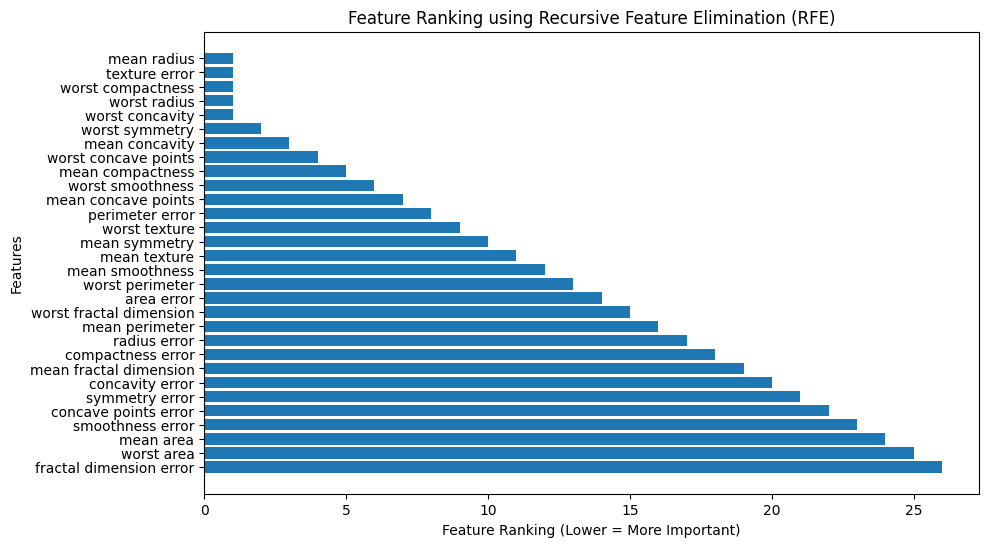

In [33]:
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking["Feature"], feature_ranking["Ranking"])
plt.xlabel("Feature Ranking (Lower = More Important)")
plt.ylabel("Features")
plt.title("Feature Ranking using Recursive Feature Elimination (RFE)")
plt.gca().invert_yaxis()
plt.show()


Block 9: Train Logistic Regression Using Selected Features

In [34]:
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

log_reg.fit(X_train_selected, y_train)


LogisticRegression(max_iter=5000)

Block 10: Evaluation – Model with Selected Features

In [35]:
y_pred_sel = log_reg.predict(X_test_selected)
y_prob_sel = log_reg.predict_proba(X_test_selected)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_sel))
print("Precision:", precision_score(y_test, y_pred_sel))
print("Recall:", recall_score(y_test, y_pred_sel))
print("F1-Score:", f1_score(y_test, y_pred_sel))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_sel))


Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1-Score: 0.9790209790209791
ROC-AUC: 0.9983622666229938


Block 11: ROC Curve – Selected Features Model (Visualization)

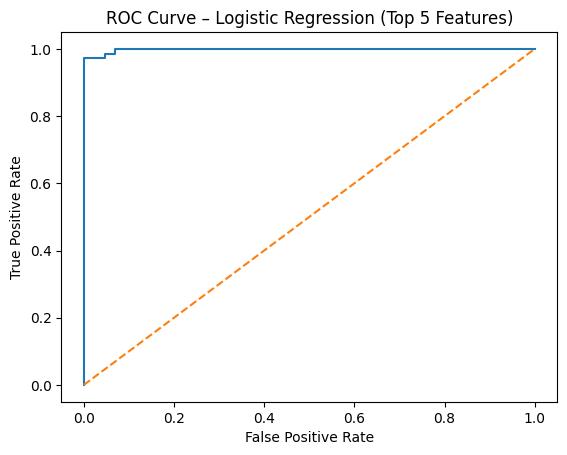

In [36]:
fpr, tpr, _ = roc_curve(y_test, y_prob_sel)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression (Top 5 Features)")
plt.show()


Block 12: Train & Evaluate Model Using All Features

In [37]:
log_reg.fit(X_train, y_train)

y_pred_all = log_reg.predict(X_test)
y_prob_all = log_reg.predict_proba(X_test)[:, 1]

print("Accuracy (All Features):", accuracy_score(y_test, y_pred_all))
print("Precision (All Features):", precision_score(y_test, y_pred_all))
print("Recall (All Features):", recall_score(y_test, y_pred_all))
print("F1-Score (All Features):", f1_score(y_test, y_pred_all))
print("ROC-AUC (All Features):", roc_auc_score(y_test, y_prob_all))


Accuracy (All Features): 0.956140350877193
Precision (All Features): 0.9459459459459459
Recall (All Features): 0.9859154929577465
F1-Score (All Features): 0.9655172413793104
ROC-AUC (All Features): 0.9977071732721913


Block 13: Performance Comparison (Visualization)

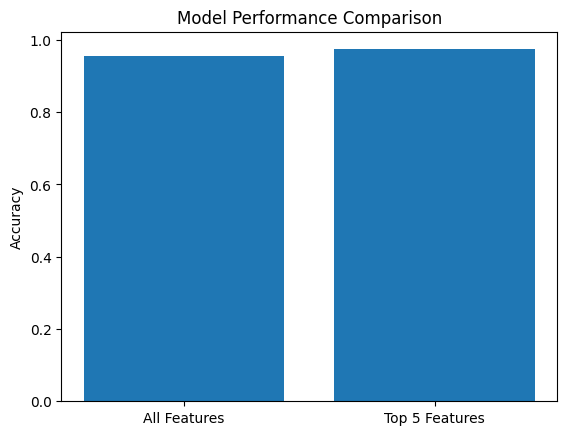

In [38]:
models = ['All Features', 'Top 5 Features']
accuracy_scores = [
    accuracy_score(y_test, y_pred_all),
    accuracy_score(y_test, y_pred_sel)
]

plt.bar(models, accuracy_scores)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()


Block 14: Experiment – Top 3 and Top 7 Features

In [39]:
for n in [3, 7]:
    rfe_exp = RFE(estimator=log_reg, n_features_to_select=n)
    rfe_exp.fit(X_train, y_train)

    X_train_rfe = rfe_exp.transform(X_train)
    X_test_rfe = rfe_exp.transform(X_test)

    log_reg.fit(X_train_rfe, y_train)
    y_pred = log_reg.predict(X_test_rfe)

    print(f"Accuracy with Top {n} Features:", accuracy_score(y_test, y_pred))


Accuracy with Top 3 Features: 0.8070175438596491
Accuracy with Top 7 Features: 0.9736842105263158


Discussion: Effect of Feature Selection on Model Performance

* Feature selection reduces
dimensionality, improving efficiency.

* Removing irrelevant features reduces overfitting.

* Models with 5–7 features achieve performance comparable to using all features.

* Too few features (e.g., top 3) may cause underfitting.

* RFE improves interpretability, which is critical in medical datasets.